# Check Data Set Summary Table

In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('../')
from utils import *

In [2]:
files = glob(os.path.join(solar_dir,'DataSets','*.csv'))

In [3]:
df = pd.read_csv(files[0])
df

,File Name,Time [MJD],RV [m/s],RV Err. [m/s],Exp. Time [s],Airmass,BERV [km/s],Instrument,Training,Standard File Name,time0,Time [eMJD]
0,Sun_210525.5167.fits,59359.857124,2.083077,0.180021,169.487000,1.078890,-1.059077e+06,expres,True,DS0.001_spec_expres.fits,59331.548814,59332.405937
1,Sun_210525.5170.fits,59359.860913,1.778902,0.180288,168.069000,1.086344,-1.067009e+06,expres,True,DS0.002_spec_expres.fits,59331.548814,59332.409727
2,Sun_210525.5171.fits,59359.863285,1.621932,0.182267,167.537003,1.091306,-1.071936e+06,expres,False,DS0.001_v_spec_expres.fits,59331.548814,59332.412099
3,Sun_210525.5175.fits,59359.873706,0.903945,0.192353,167.863007,1.115956,-1.093220e+06,expres,True,DS0.003_spec_expres.fits,59331.548814,59332.422520
4,r.HARPN.2021-05-26T10-07-49.253_S2D_BLAZE_A.fits,59360.419000,0.824183,0.299046,300.000000,1.320948,-5.109644e-02,harpsn,True,DS0.004_spec_harpsn.fits,59331.548814,59332.967814
...,...,...,...,...,...,...,...,...,...,...,...,...
327,r.HARPN.2021-06-22T12-09-15.293_S2D_BLAZE_A.fits,59387.503000,-0.575935,0.284992,300.000000,1.034233,-6.364489e-03,harpsn,True,DS0.246_spec_harpsn.fits,59331.548814,59360.051814
328,r.HARPS.2021-06-22T17:34:20.363_S2D_BLAZE_A.fits,59387.727314,1.769563,0.287910,29.996500,1.701493,-1.843815e-01,harps,False,DS0.083_v_spec_harps.fits,59331.548814,59360.276127
329,r.HARPS.2021-06-22T17:35:21.376_S2D_BLAZE_A.fits,59387.728020,-0.540289,0.288271,29.996500,1.703713,-1.859872e-01,harps,True,DS0.247_spec_harps.fits,59331.548814,59360.276834
330,r.HARPS.2021-06-22T17:36:22.379_S2D_BLAZE_A.fits,59387.728726,-0.423258,0.288395,29.996500,1.705982,-1.875909e-01,harps,True,DS0.248_spec_harps.fits,59331.548814,59360.277540


In [4]:
df.set_index('Standard File Name').index

Index(['DS0.001_spec_expres.fits', 'DS0.002_spec_expres.fits',
       'DS0.001_v_spec_expres.fits', 'DS0.003_spec_expres.fits',
       'DS0.004_spec_harpsn.fits', 'DS0.005_spec_harpsn.fits',
       'DS0.002_v_spec_harpsn.fits', 'DS0.006_spec_harpsn.fits',
       'DS0.007_spec_harps.fits', 'DS0.008_spec_harps.fits',
       ...
       'DS0.242_spec_neid.fits', 'DS0.243_spec_neid.fits',
       'DS0.082_v_spec_harpsn.fits', 'DS0.244_spec_harpsn.fits',
       'DS0.245_spec_harpsn.fits', 'DS0.246_spec_harpsn.fits',
       'DS0.083_v_spec_harps.fits', 'DS0.247_spec_harps.fits',
       'DS0.248_spec_harps.fits', 'DS0.249_spec_harps.fits'],
      dtype='object', name='Standard File Name', length=332)

## Number of Observations Per Instrument

In [5]:
for inst in instruments:
    print(inst,np.sum(df['Instrument']==inst))

harpsn 68
harps 68
expres 96
neid 100


## Time Offset

In [6]:
Time(df['Time [eMJD]'],format='mjd').isot[:3]

array(['2021-04-28T09:44:32.964', '2021-04-28T09:50:00.401',
       '2021-04-28T09:53:25.330'], dtype='<U23')

In [7]:
np.isclose(df['Time [eMJD]']-df['time0']+mon_min,df['Time [MJD]']).all()

True

## Check File Numbering

In [8]:
(np.diff(np.array([file.split('_')[0].split('.')[1] for file in df['Standard File Name'][df['Training']]]).astype(int))==1).all()

True

In [9]:
(np.diff(np.array([file.split('_')[0].split('.')[1] for file in df['Standard File Name'][~df['Training']]]).astype(int))==1).all()

True

## Check Training/Validation

In [10]:
print(np.sum(df['Training']),len(df))

249 332


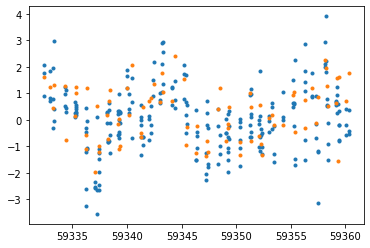

In [11]:
t = df['Training']
plt.plot(df['Time [eMJD]'][t],df['RV [m/s]'][t],'.')
plt.plot(df['Time [eMJD]'][~t],df['RV [m/s]'][~t],'.')